In [1]:
import numpy as np 
import pandas as pd 
import cv2 
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import random as rn
import pandas as pd


list_dir= ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [2]:
X=[]
Z=[]

def assign_label (flower_type, img):
  if (flower_type== 'daisy'):
    return 1 
  elif (flower_type== 'dandelion'):
    return 2 
  elif (flower_type=='rose'):
    return 3 
  elif (flower_type=='sunflower'):
    return 4
  else:
    return 0
  

for flower in list_dir:
    
    inputdataset = f"/home/saleha/Desktop/projects/dataset/flowers/{flower}"
    cleandataset = f"/home/saleha/Desktop/projects/cleaned/flowers/{flower}"

    if not os.path.exists(cleandataset):
       os.makedirs(cleandataset)

    for filename in os.listdir(inputdataset):
            img= cv2.imread((os.path.join(inputdataset, filename)), cv2.IMREAD_COLOR)
            img= cv2.resize(img,(100,100))

            label = assign_label(str(flower),img)
            X.append(np.array(img/255))
            Z.append(label)


from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# f,ax = plt.subplots(7,3)
# f.set_size_inches(15,15)
# for i in range(7):
#     for j in range(3):
#         l = rn.randint(0,len(Z))
#         ax[i,j].imshow(X[l])
#         ax[i,j].set_title("Flower: " + str(Z[l]))

        
# #plt.tight_layout()

labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(Z)
Y = to_categorical(Y,5)
X = np.array(X)
X= X/255 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

2023-04-28 23:13:36.926532: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 23:13:37.506650: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 23:13:37.511037: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 23:13:41.640101: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


x_train shape:  (3453, 100, 100, 3)
x_test shape:  (864, 100, 100, 3)
y_train shape:  (3453, 5)
y_test shape:  (864, 5)


In [5]:
y_train.size

3453

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

# Define model architecture
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation="relu", input_shape = (100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(5, activation="softmax"))

epochs = 10
batch_size = 32

from keras.optimizers import Adam
opt = Adam(lr=0.01)

model.compile(optimizer=Adam(learning_rate=0.01), loss="categorical_crossentropy", metrics = ["accuracy"])

# Compile the model


# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)


/home/saleha/.local/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-04-28 23:15:01.074885: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 414360000 exceeds 10% of free system memory.


Epoch 1/10
108/108 [==============================] - 126s 1s/step - loss: 1.6060 - accuracy: 0.2233 - val_loss: 1.5966 - val_accuracy: 0.2581
Epoch 2/10
108/108 [==============================] - 110s 1s/step - loss: 1.6014 - accuracy: 0.2285 - val_loss: 1.5974 - val_accuracy: 0.2581
Epoch 3/10
108/108 [==============================] - 143s 1s/step - loss: 1.6006 - accuracy: 0.2366 - val_loss: 1.5971 - val_accuracy: 0.2581
Epoch 4/10
108/108 [==============================] - 148s 1s/step - loss: 1.6003 - accuracy: 0.2256 - val_loss: 1.5955 - val_accuracy: 0.2581
Epoch 5/10
108/108 [==============================] - 158s 1s/step - loss: 1.6012 - accuracy: 0.2349 - val_loss: 1.5962 - val_accuracy: 0.2581
Epoch 6/10
108/108 [==============================] - 143s 1s/step - loss: 1.6003 - accuracy: 0.2357 - val_loss: 1.5962 - val_accuracy: 0.2581
Epoch 7/10
108/108 [==============================] - 100s 932ms/step - loss: 1.6003 - accuracy: 0.2343 - val_loss: 1.5971 - val_accuracy: 0.2

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy: %.2f%%" % (score[1]*100))


2023-04-28 23:36:12.228891: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 103680000 exceeds 10% of free system memory.


Test accuracy: 25.81%


In [7]:
from sklearn.metrics import classification_report

y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)

report = classification_report(np.argmax(y_test, axis=1), y_pred)
print(report)


2023-04-28 23:37:49.982805: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 103680000 exceeds 10% of free system memory.


27/27 [==============================] - 5s 193ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       189
           1       0.00      0.00      0.00       162
           2       0.26      1.00      0.41       223
           3       0.00      0.00      0.00       155
           4       0.00      0.00      0.00       135

    accuracy                           0.26       864
   macro avg       0.05      0.20      0.08       864
weighted avg       0.07      0.26      0.11       864



/home/saleha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/saleha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/saleha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2023-04-28 23:38:25.940641: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 103680000 exceeds 10% of free system memory.


27/27 [==============================] - 5s 169ms/step


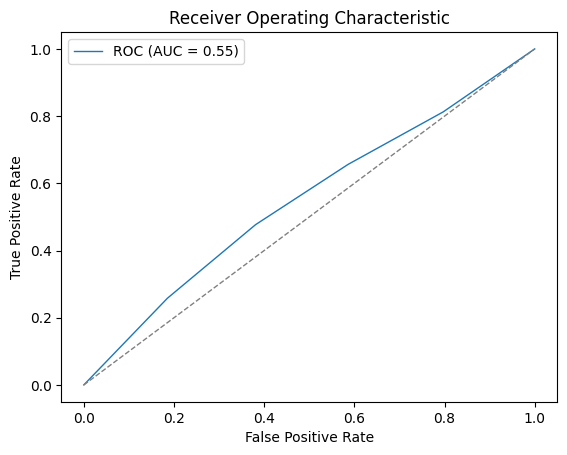

In [8]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_prob.ravel())

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()
